In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolo12s.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 18.1M/18.1M [00:00<00:00, 179MB/s]
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,261,840 parameters, 0 gradients, 21.4 GFLOPs

100% 104k/104k [00:00<00:00, 112MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 52.7ms
Speed: 12.8ms preprocess, 52.7ms inference, 364.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Custom Training

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="N70sgaHQBZjV3QOBznpa")
project = rf.workspace("ram-pfyl3").project("yolo12-rxrsz")
version = project.version(2)
dataset = version.download("yolov12")




/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolo12-2 in yolov12:: 100%|██████████| 124/124 [00:00<00:00, 1553.81it/s]


In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolo12s.pt data=/content/datasets/yolo12-2/data.yaml epochs=100 imgsz=640 plots=True

/content
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/yolo12-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

In [24]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Run validation
results = model.val()

# Extract metrics (they are properties, not functions)
mp = results.box.mp
mr = results.box.mr
map50 = results.box.map50
map = results.box.map

# Print them
print("\n📊 Evaluation Results:")
print(f"Precision      : {mp:.4f}")
print(f"Recall         : {mr:.4f}")
print(f"mAP@0.5        : {map50:.4f}")
print(f"mAP@0.5:0.95   : {map:.4f}")


Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,231,267 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2190.0±536.7 MB/s, size: 73.7 KB)


val: Scanning /content/datasets/yolo12-2/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


                   all          6        114      0.903      0.984      0.981      0.883
Speed: 1.4ms preprocess, 20.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val8

📊 Evaluation Results:
Precision      : 0.9034
Recall         : 0.9840
mAP@0.5        : 0.9812
mAP@0.5:0.95   : 0.8831


# Print the metrics
metrics = results.metrics

print("\n📊 Evaluation Results:")
print(f"Precision      : {metrics['precision']:.4f}")
print(f"Recall         : {metrics['recall']:.4f}")
print(f"mAP@0.5        : {metrics['map50']:.4f}")
print(f"mAP@0.5:0.95   : {metrics['map']:.4f}")

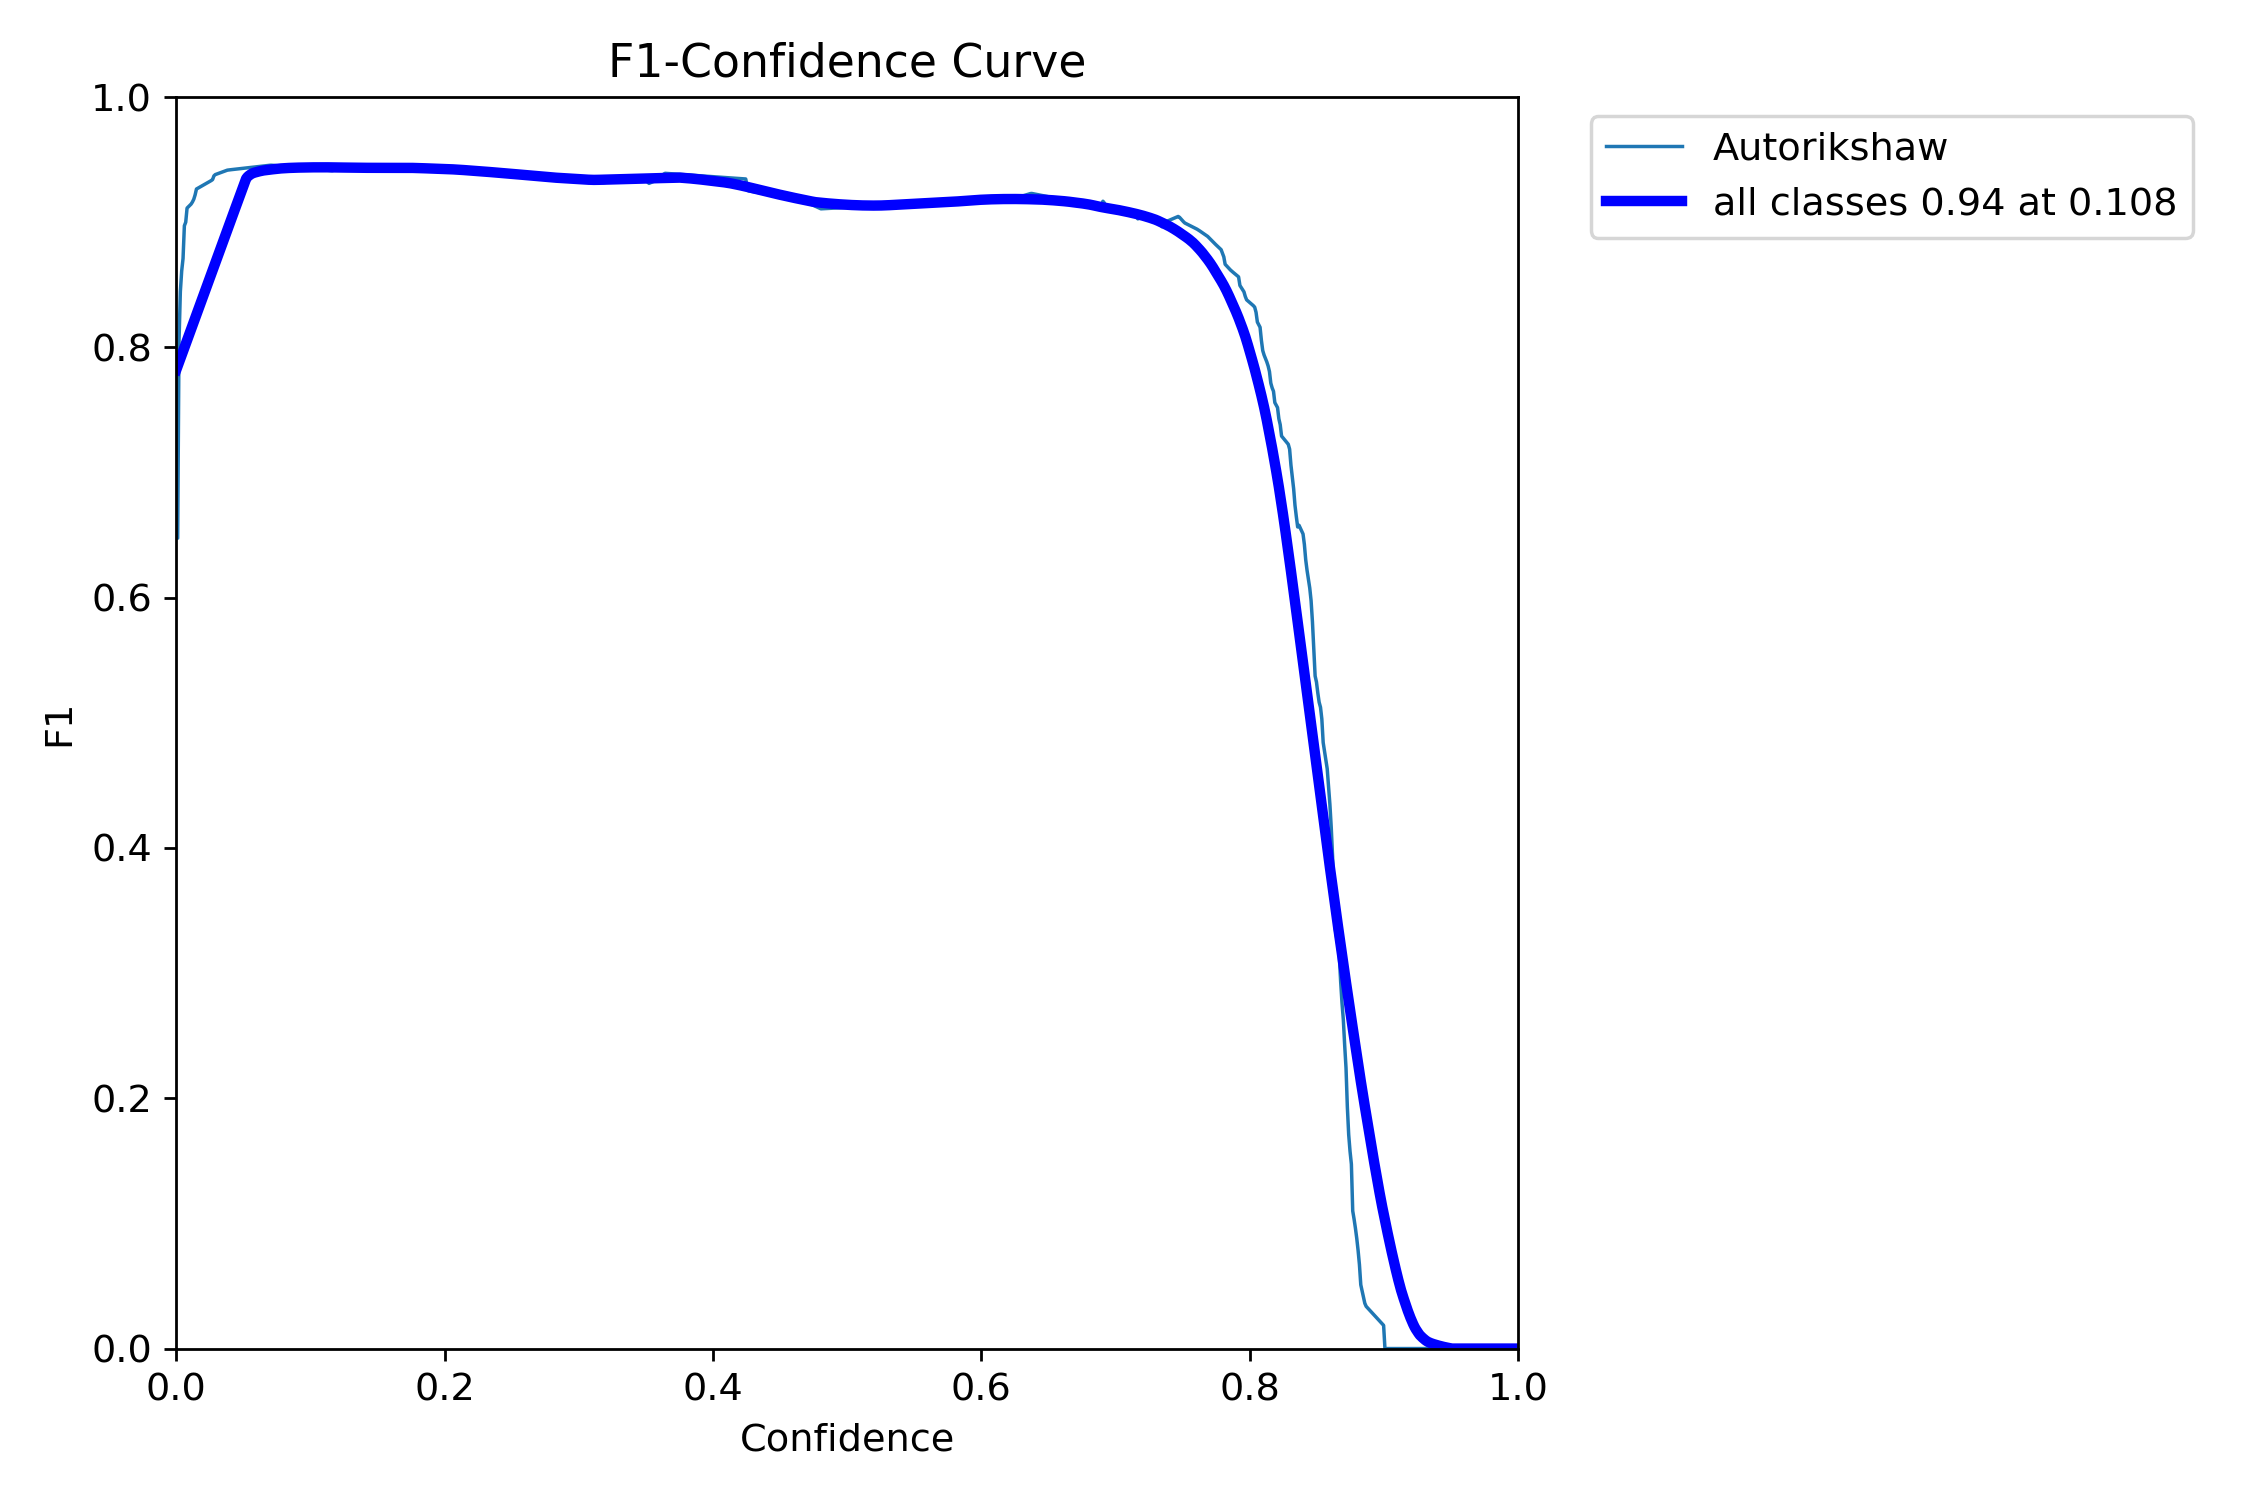

In [25]:
from IPython.display import Image, display

# Display the F1 curve image
image_path = '/content/runs/detect/train3/F1_curve.png'
display(Image(filename=image_path))

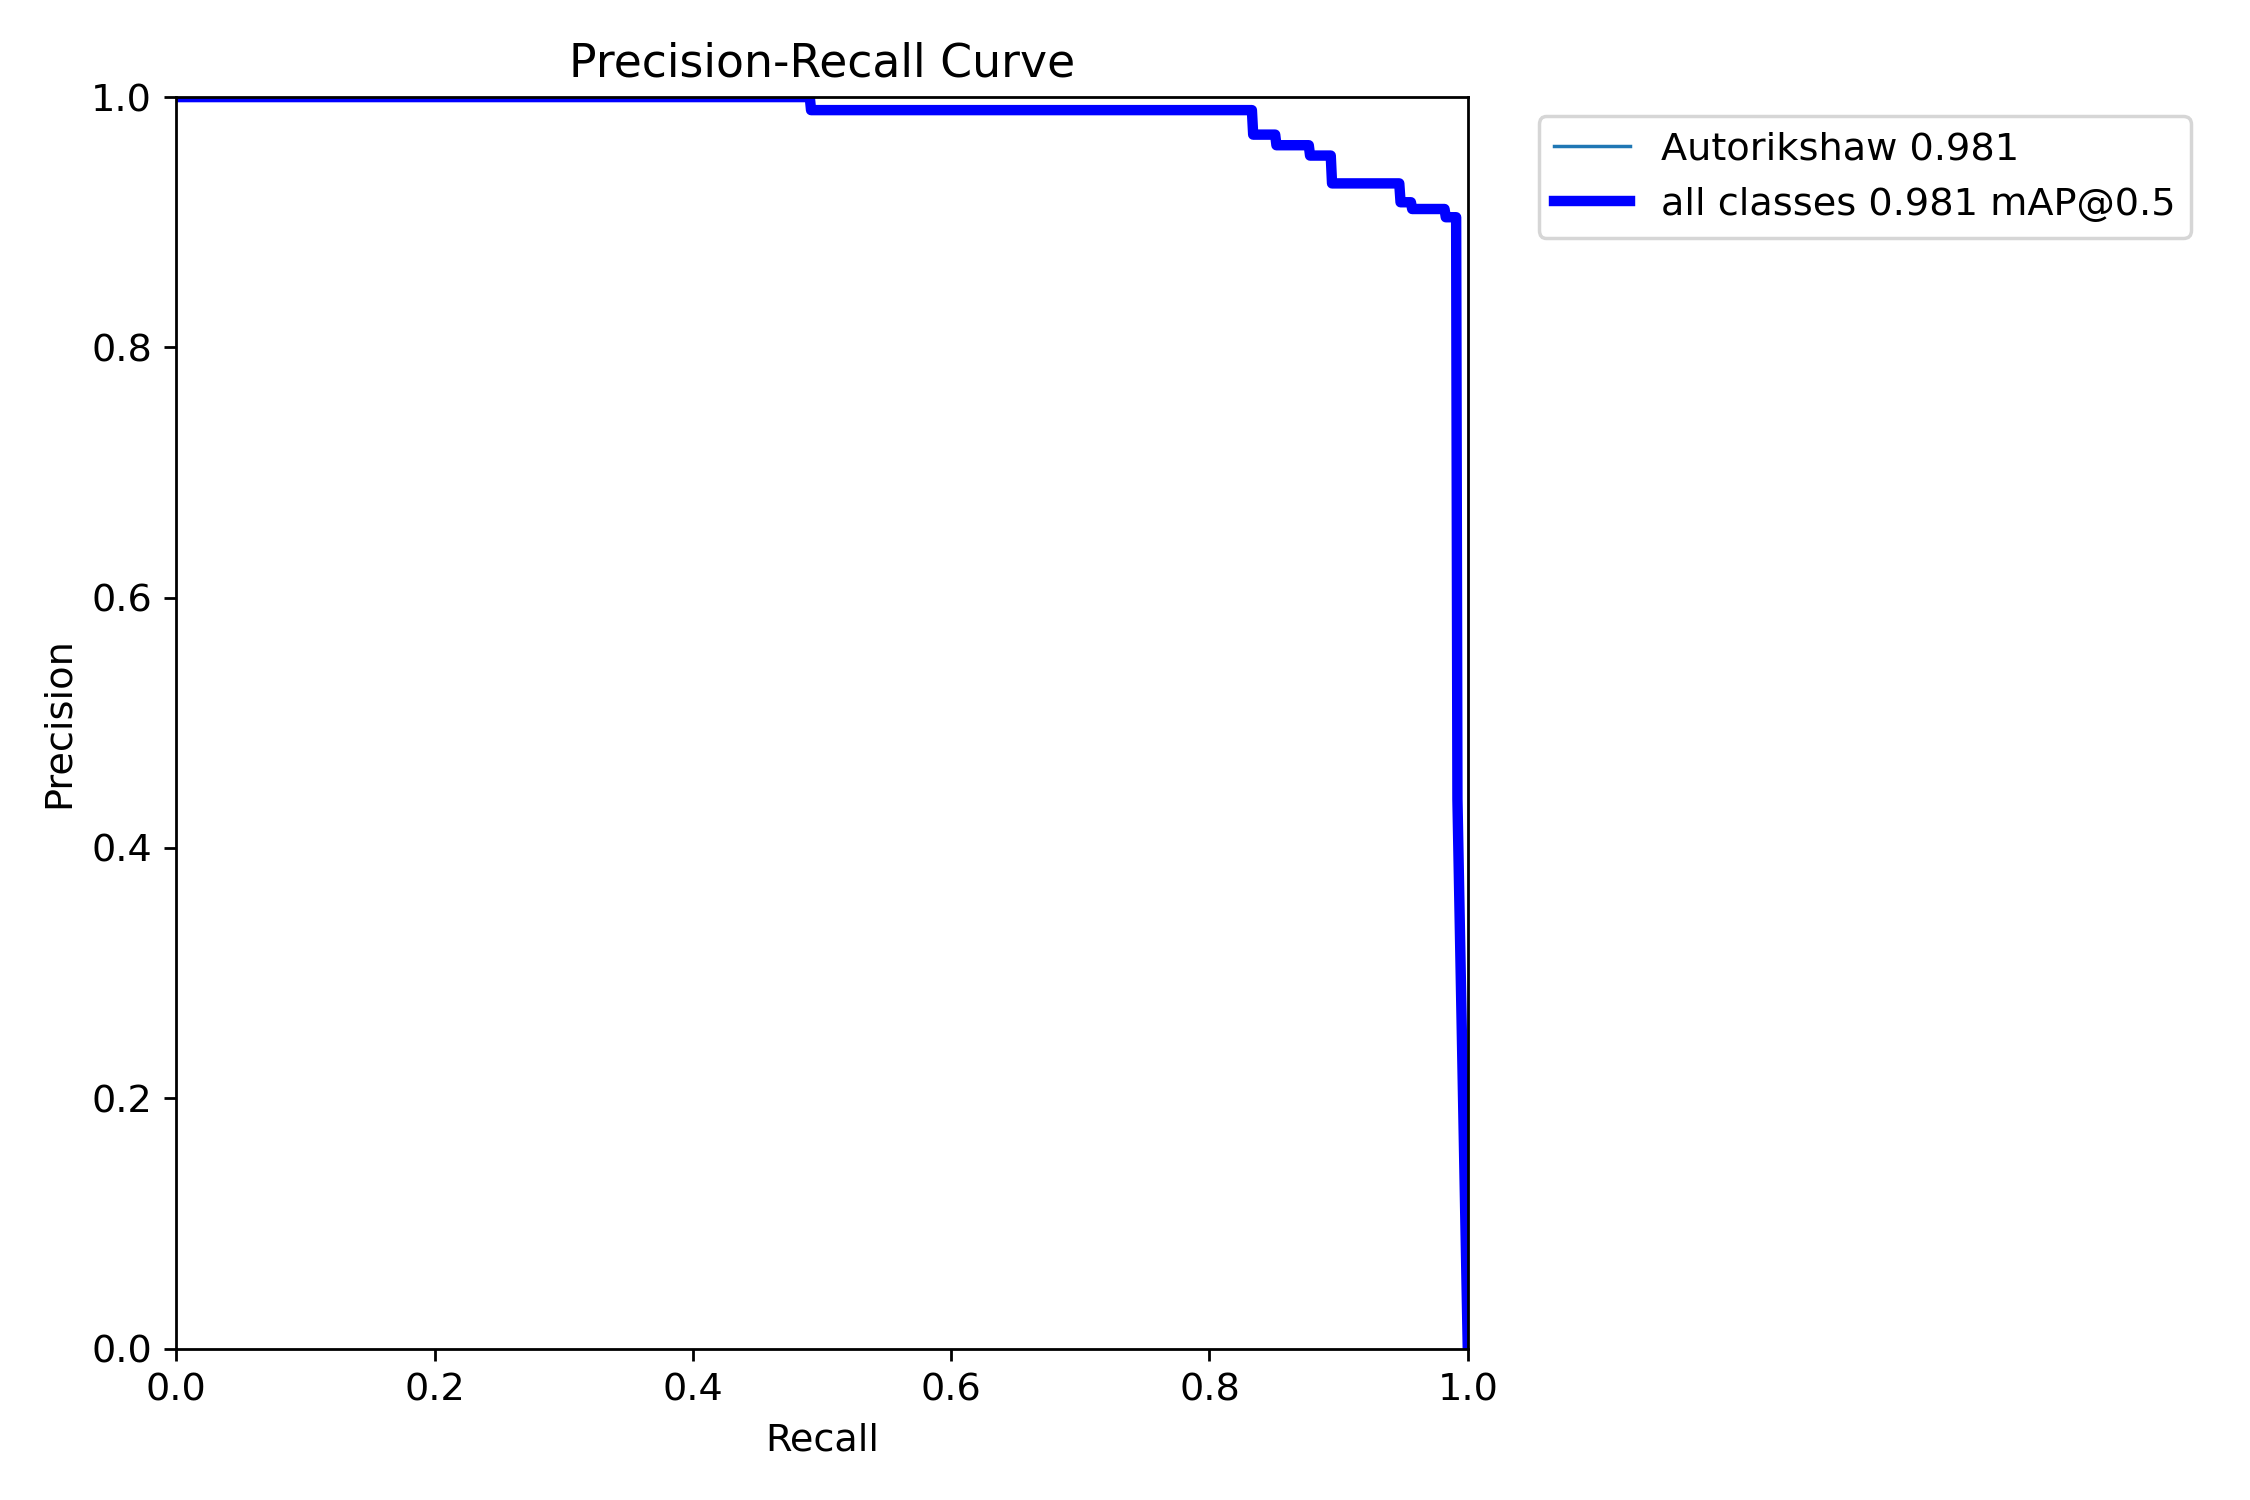

In [26]:
image_path = '/content/runs/detect/train3/PR_curve.png'
display(Image(filename=image_path))

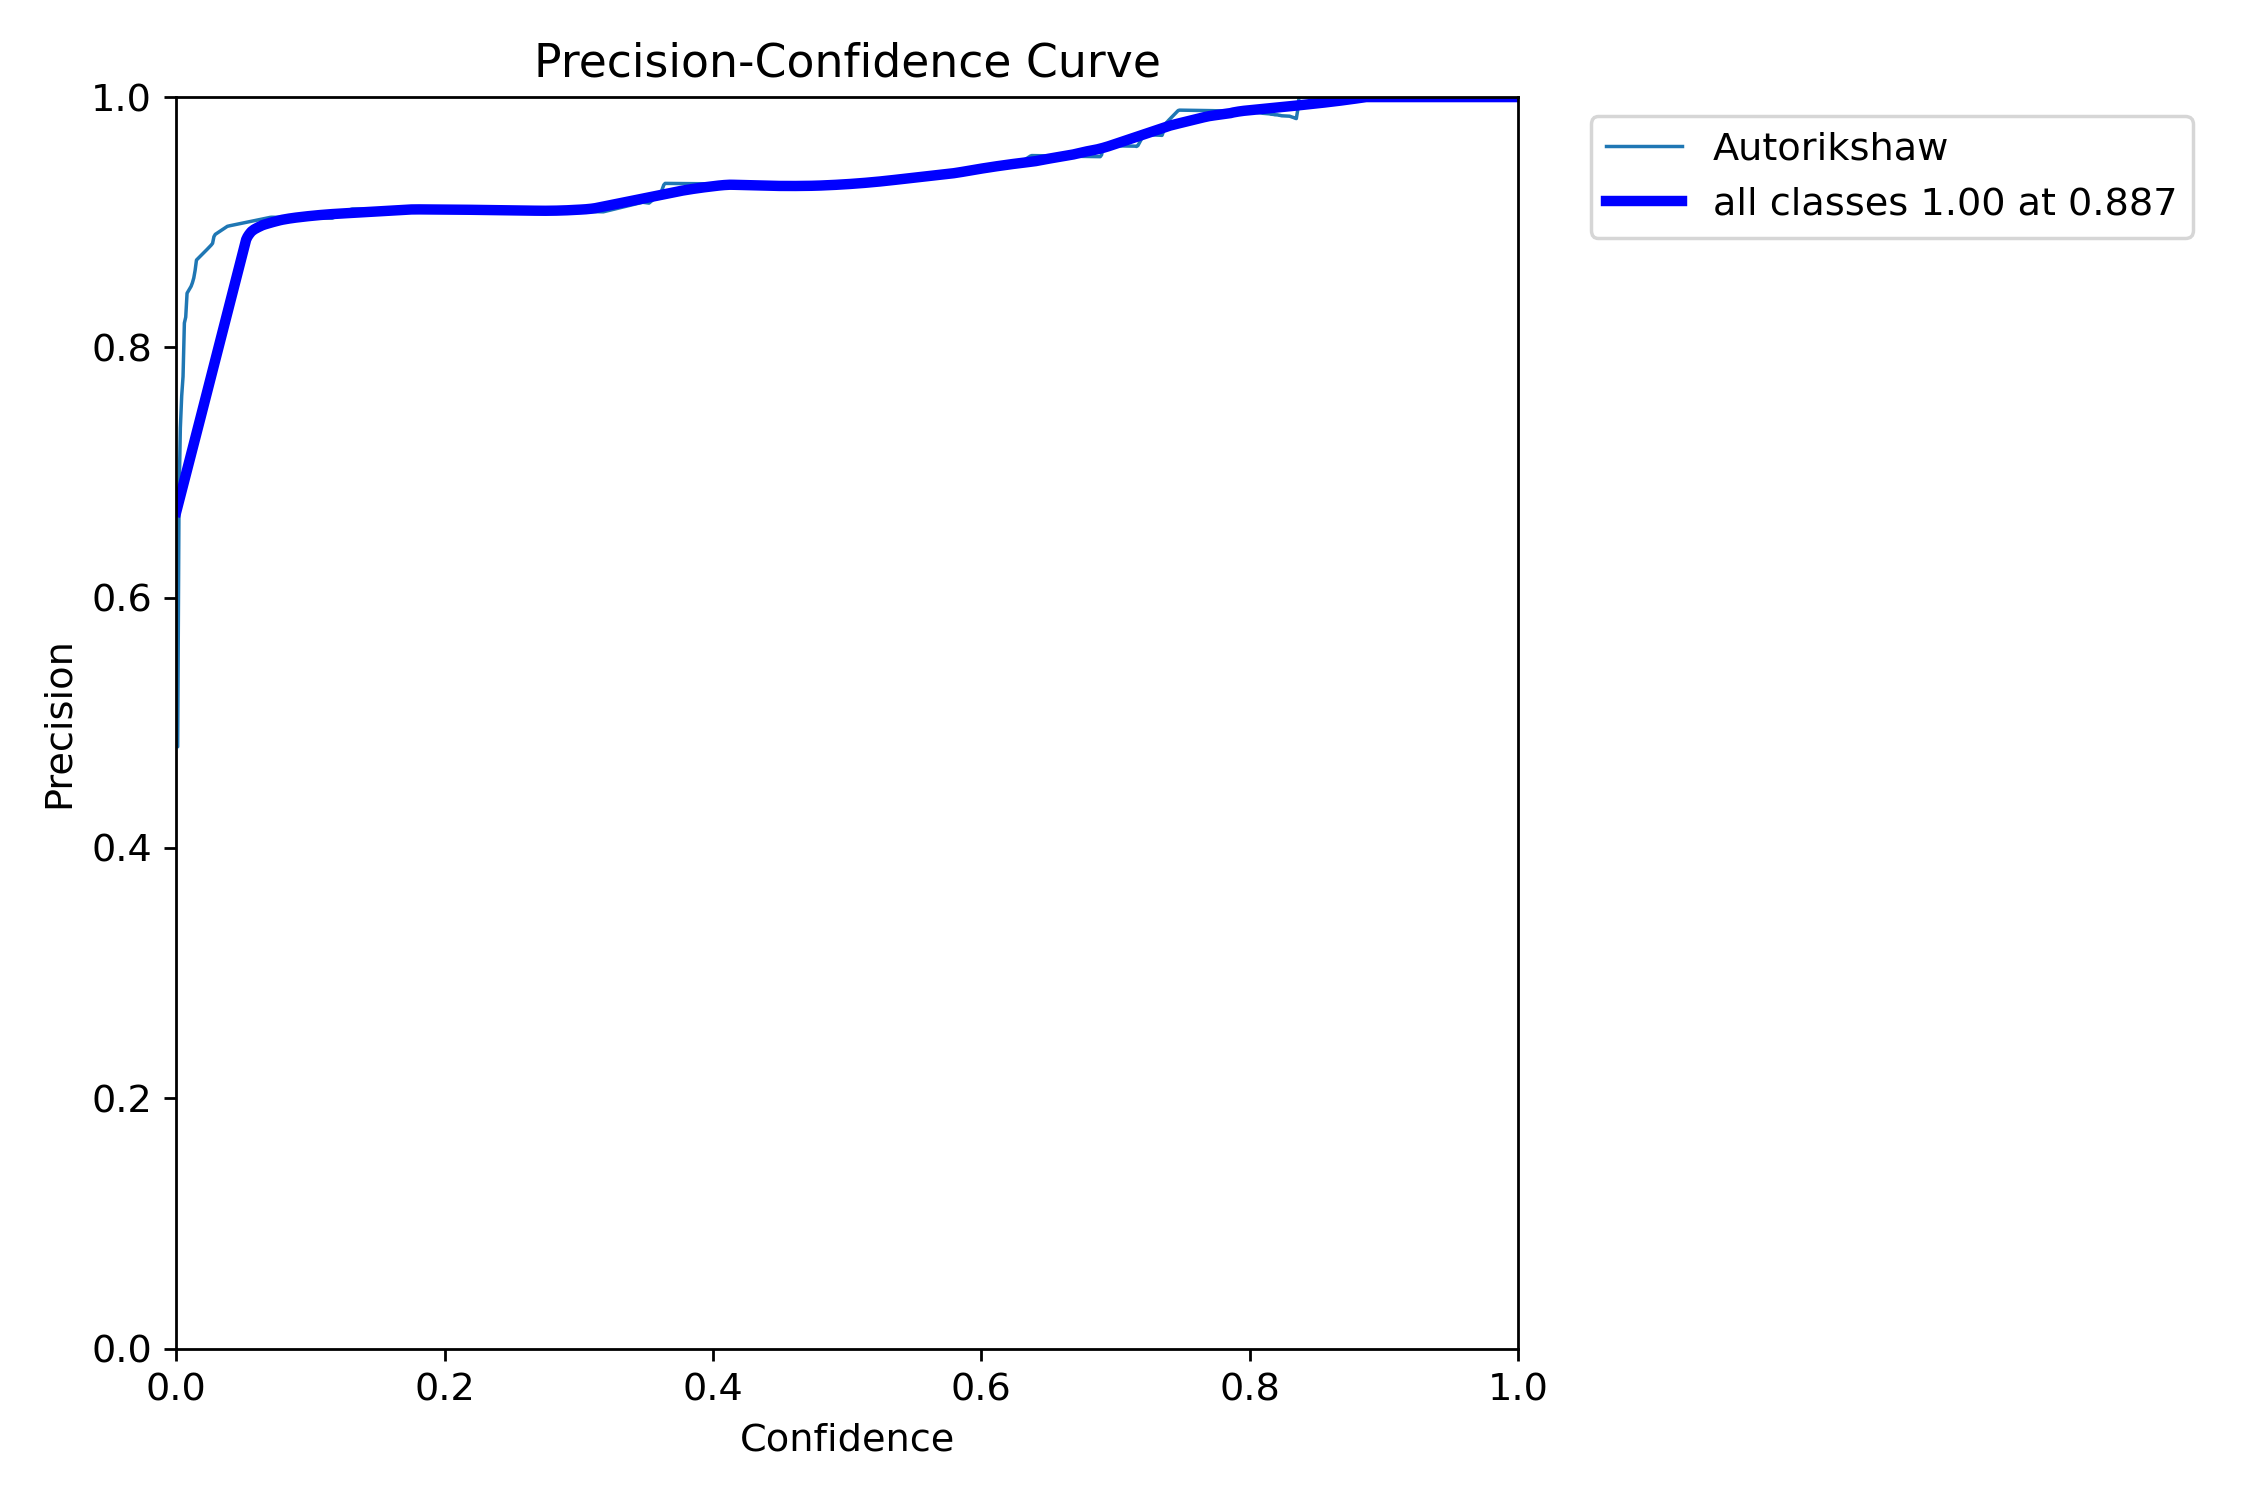

In [27]:
image_path = '/content/runs/detect/train3/P_curve.png'
display(Image(filename=image_path))

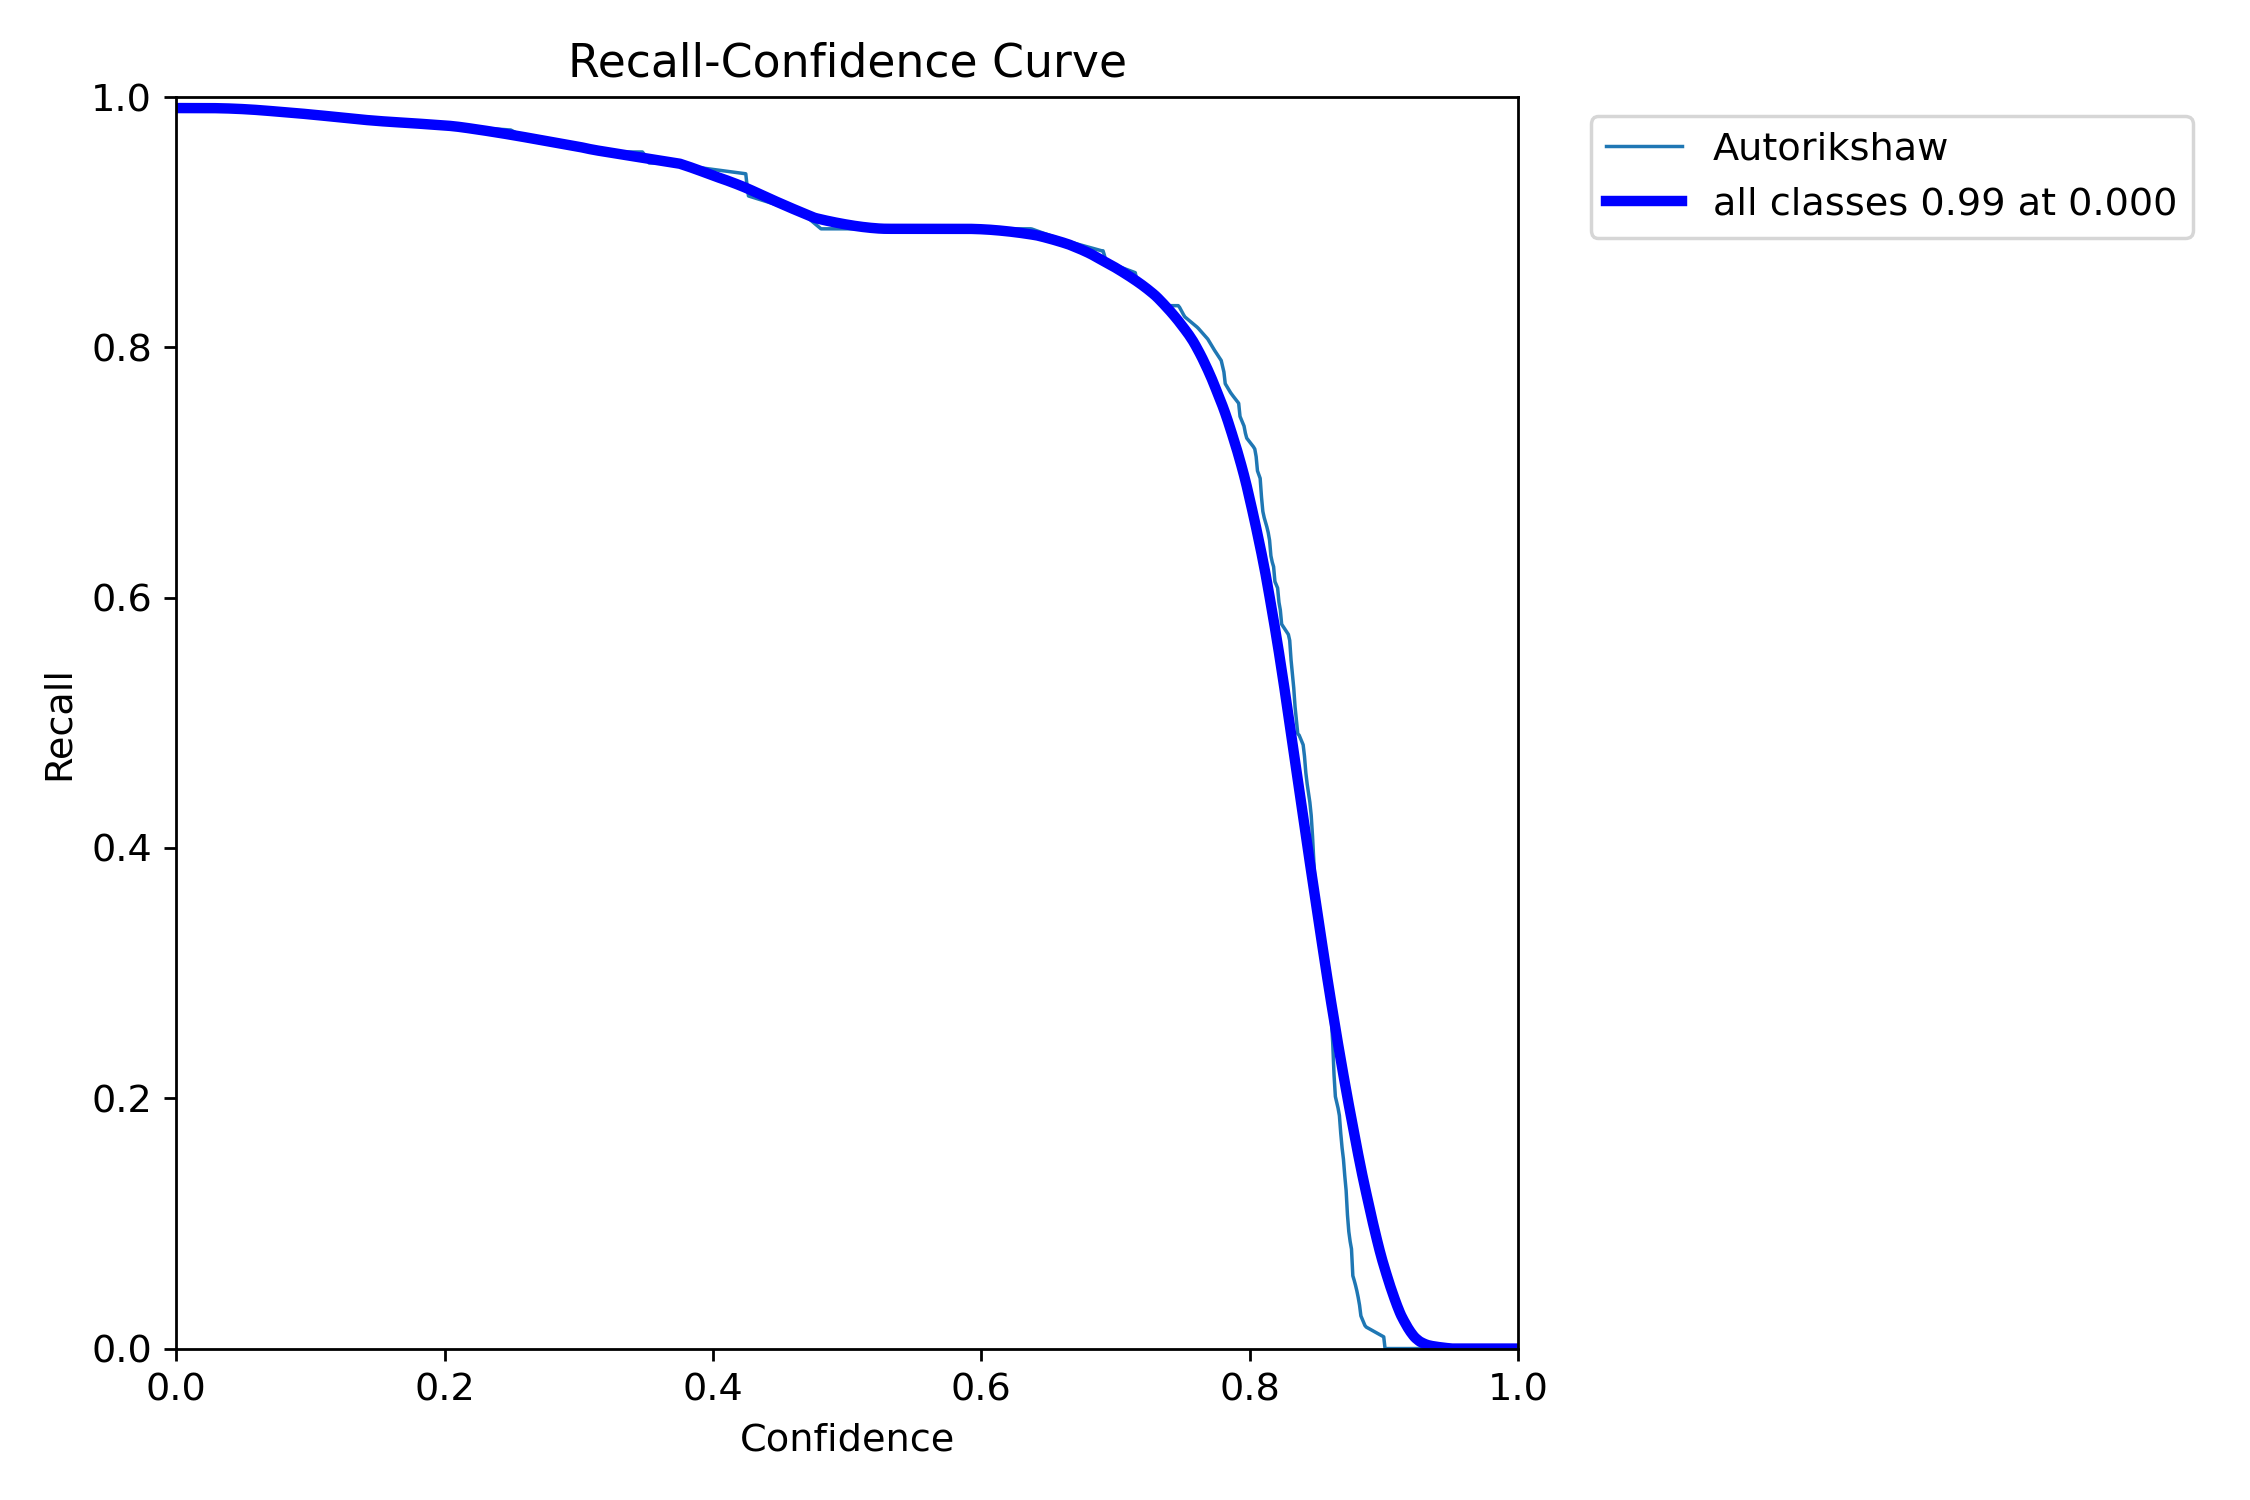

In [28]:
image_path = '/content/runs/detect/train3/R_curve.png'
display(Image(filename=image_path))

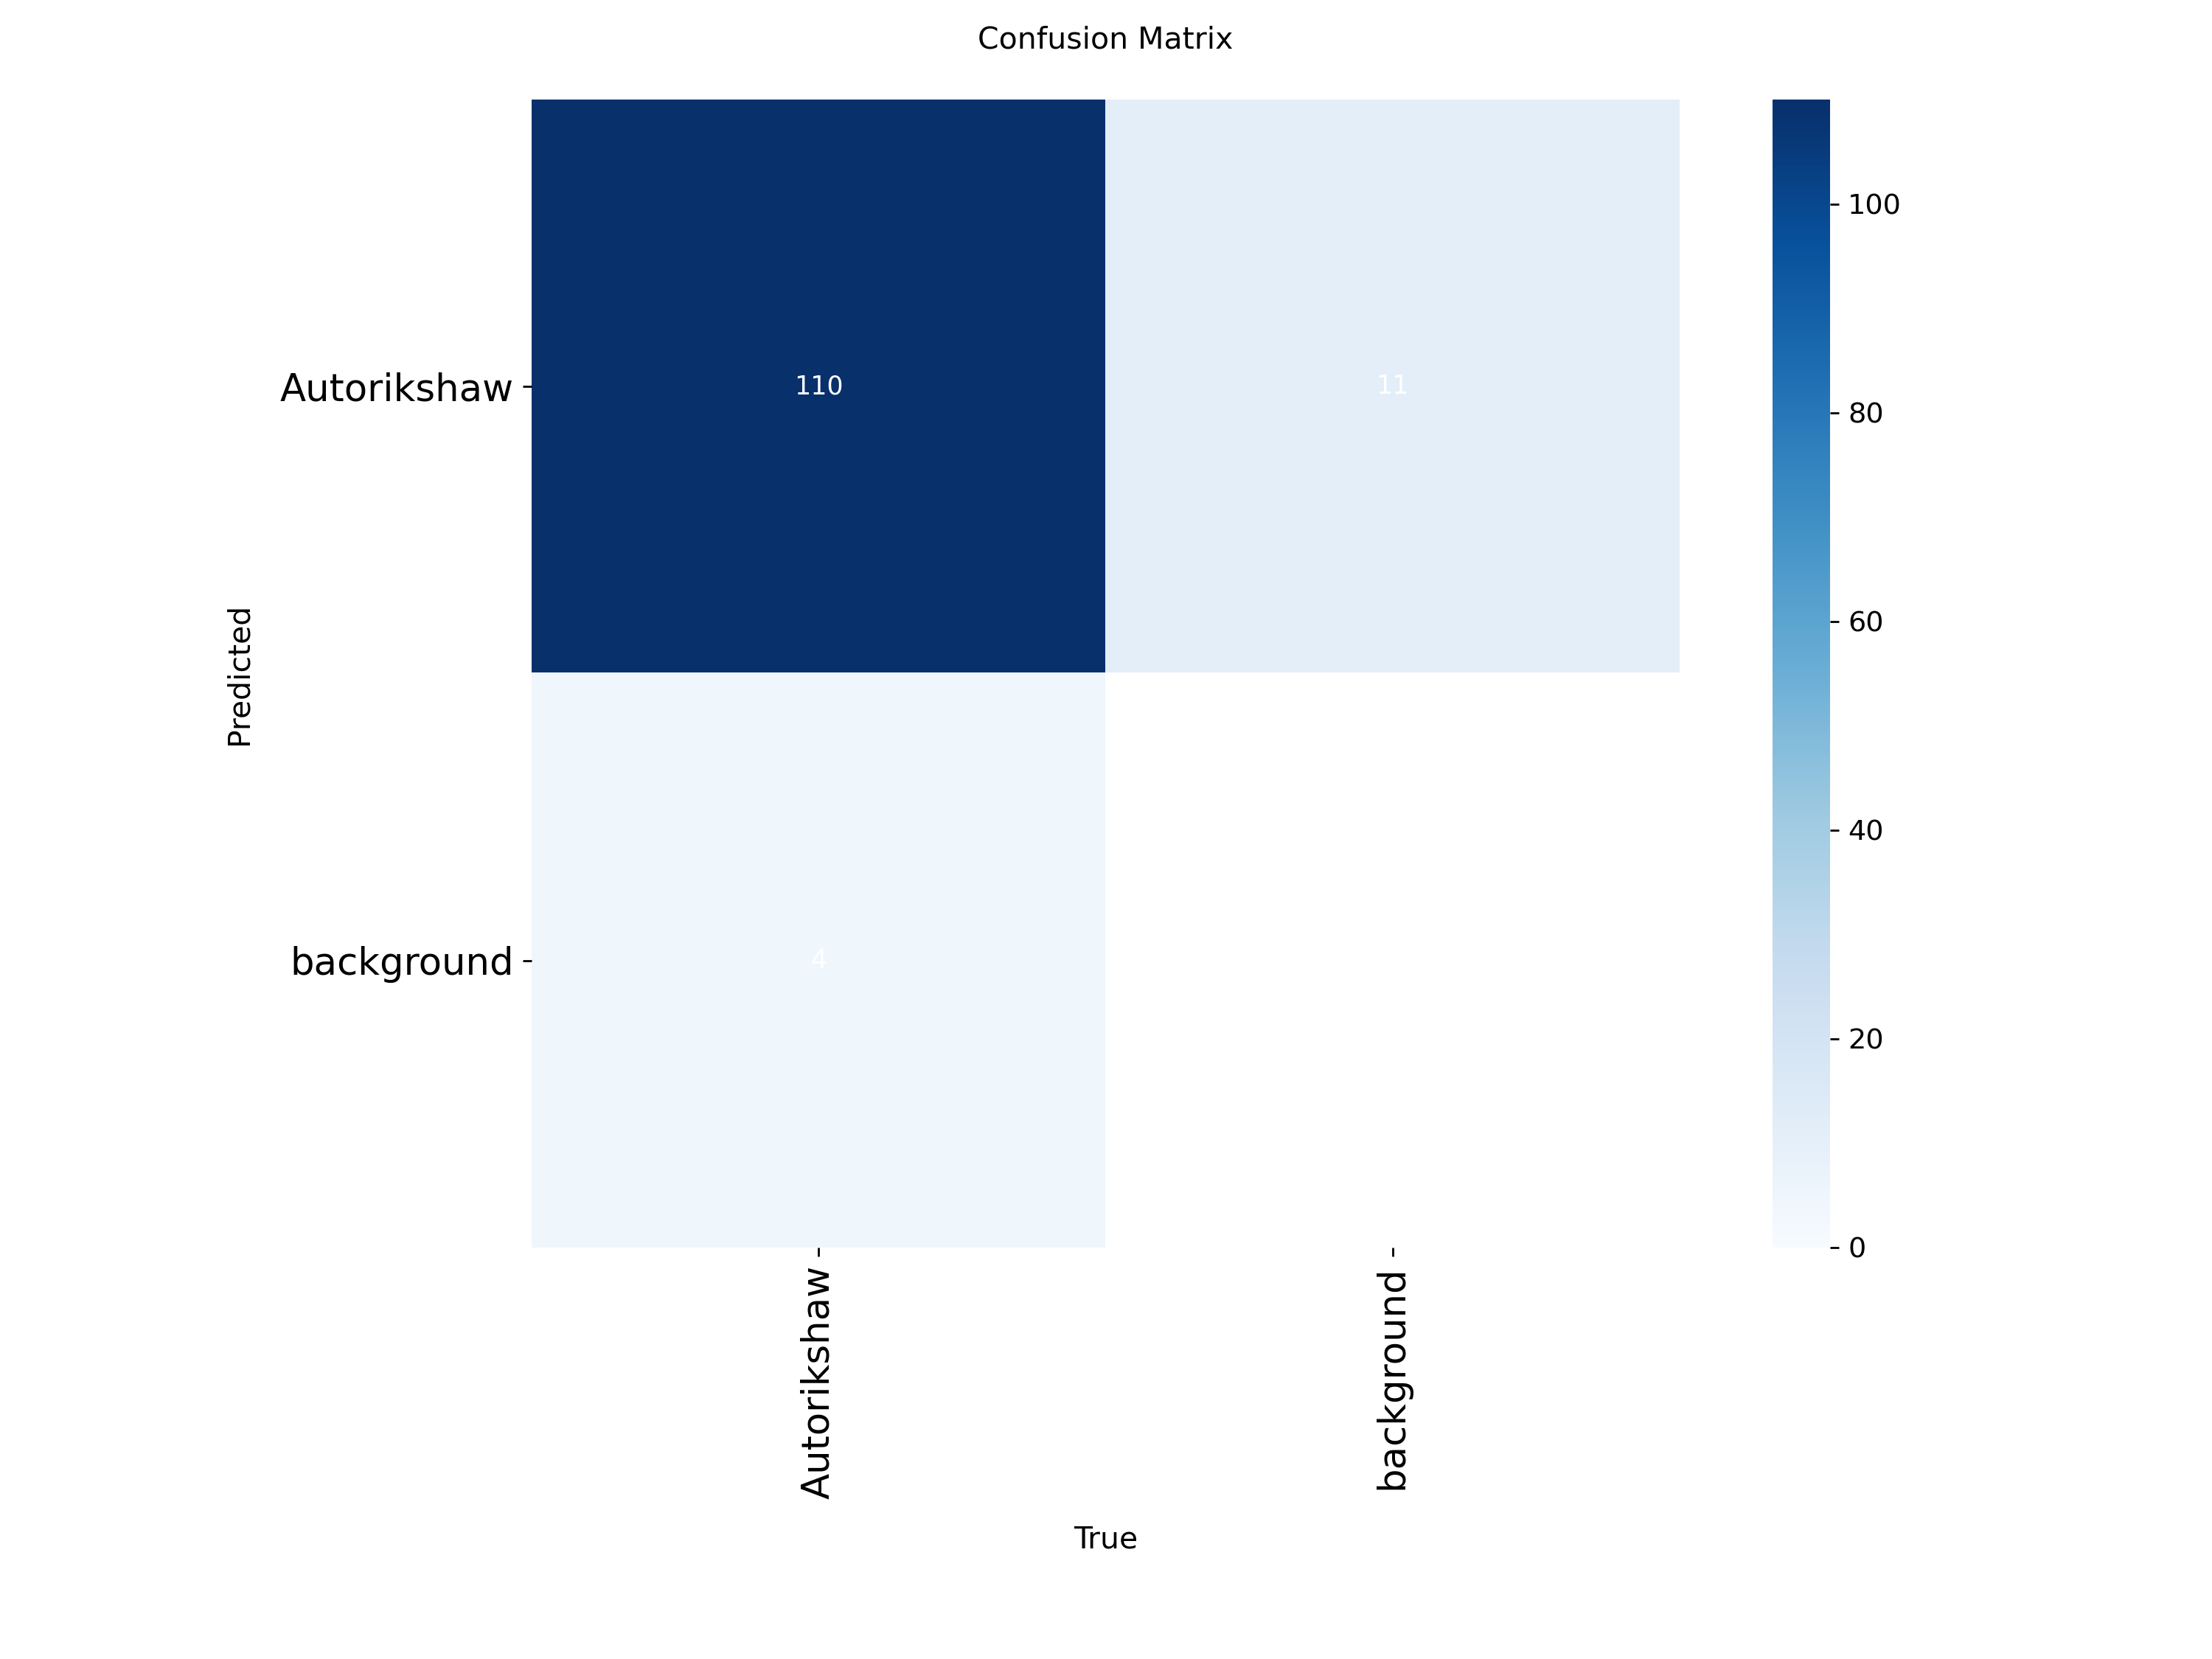

In [29]:

image_path = '/content/runs/detect/train3/confusion_matrix.png'
display(Image(filename=image_path))

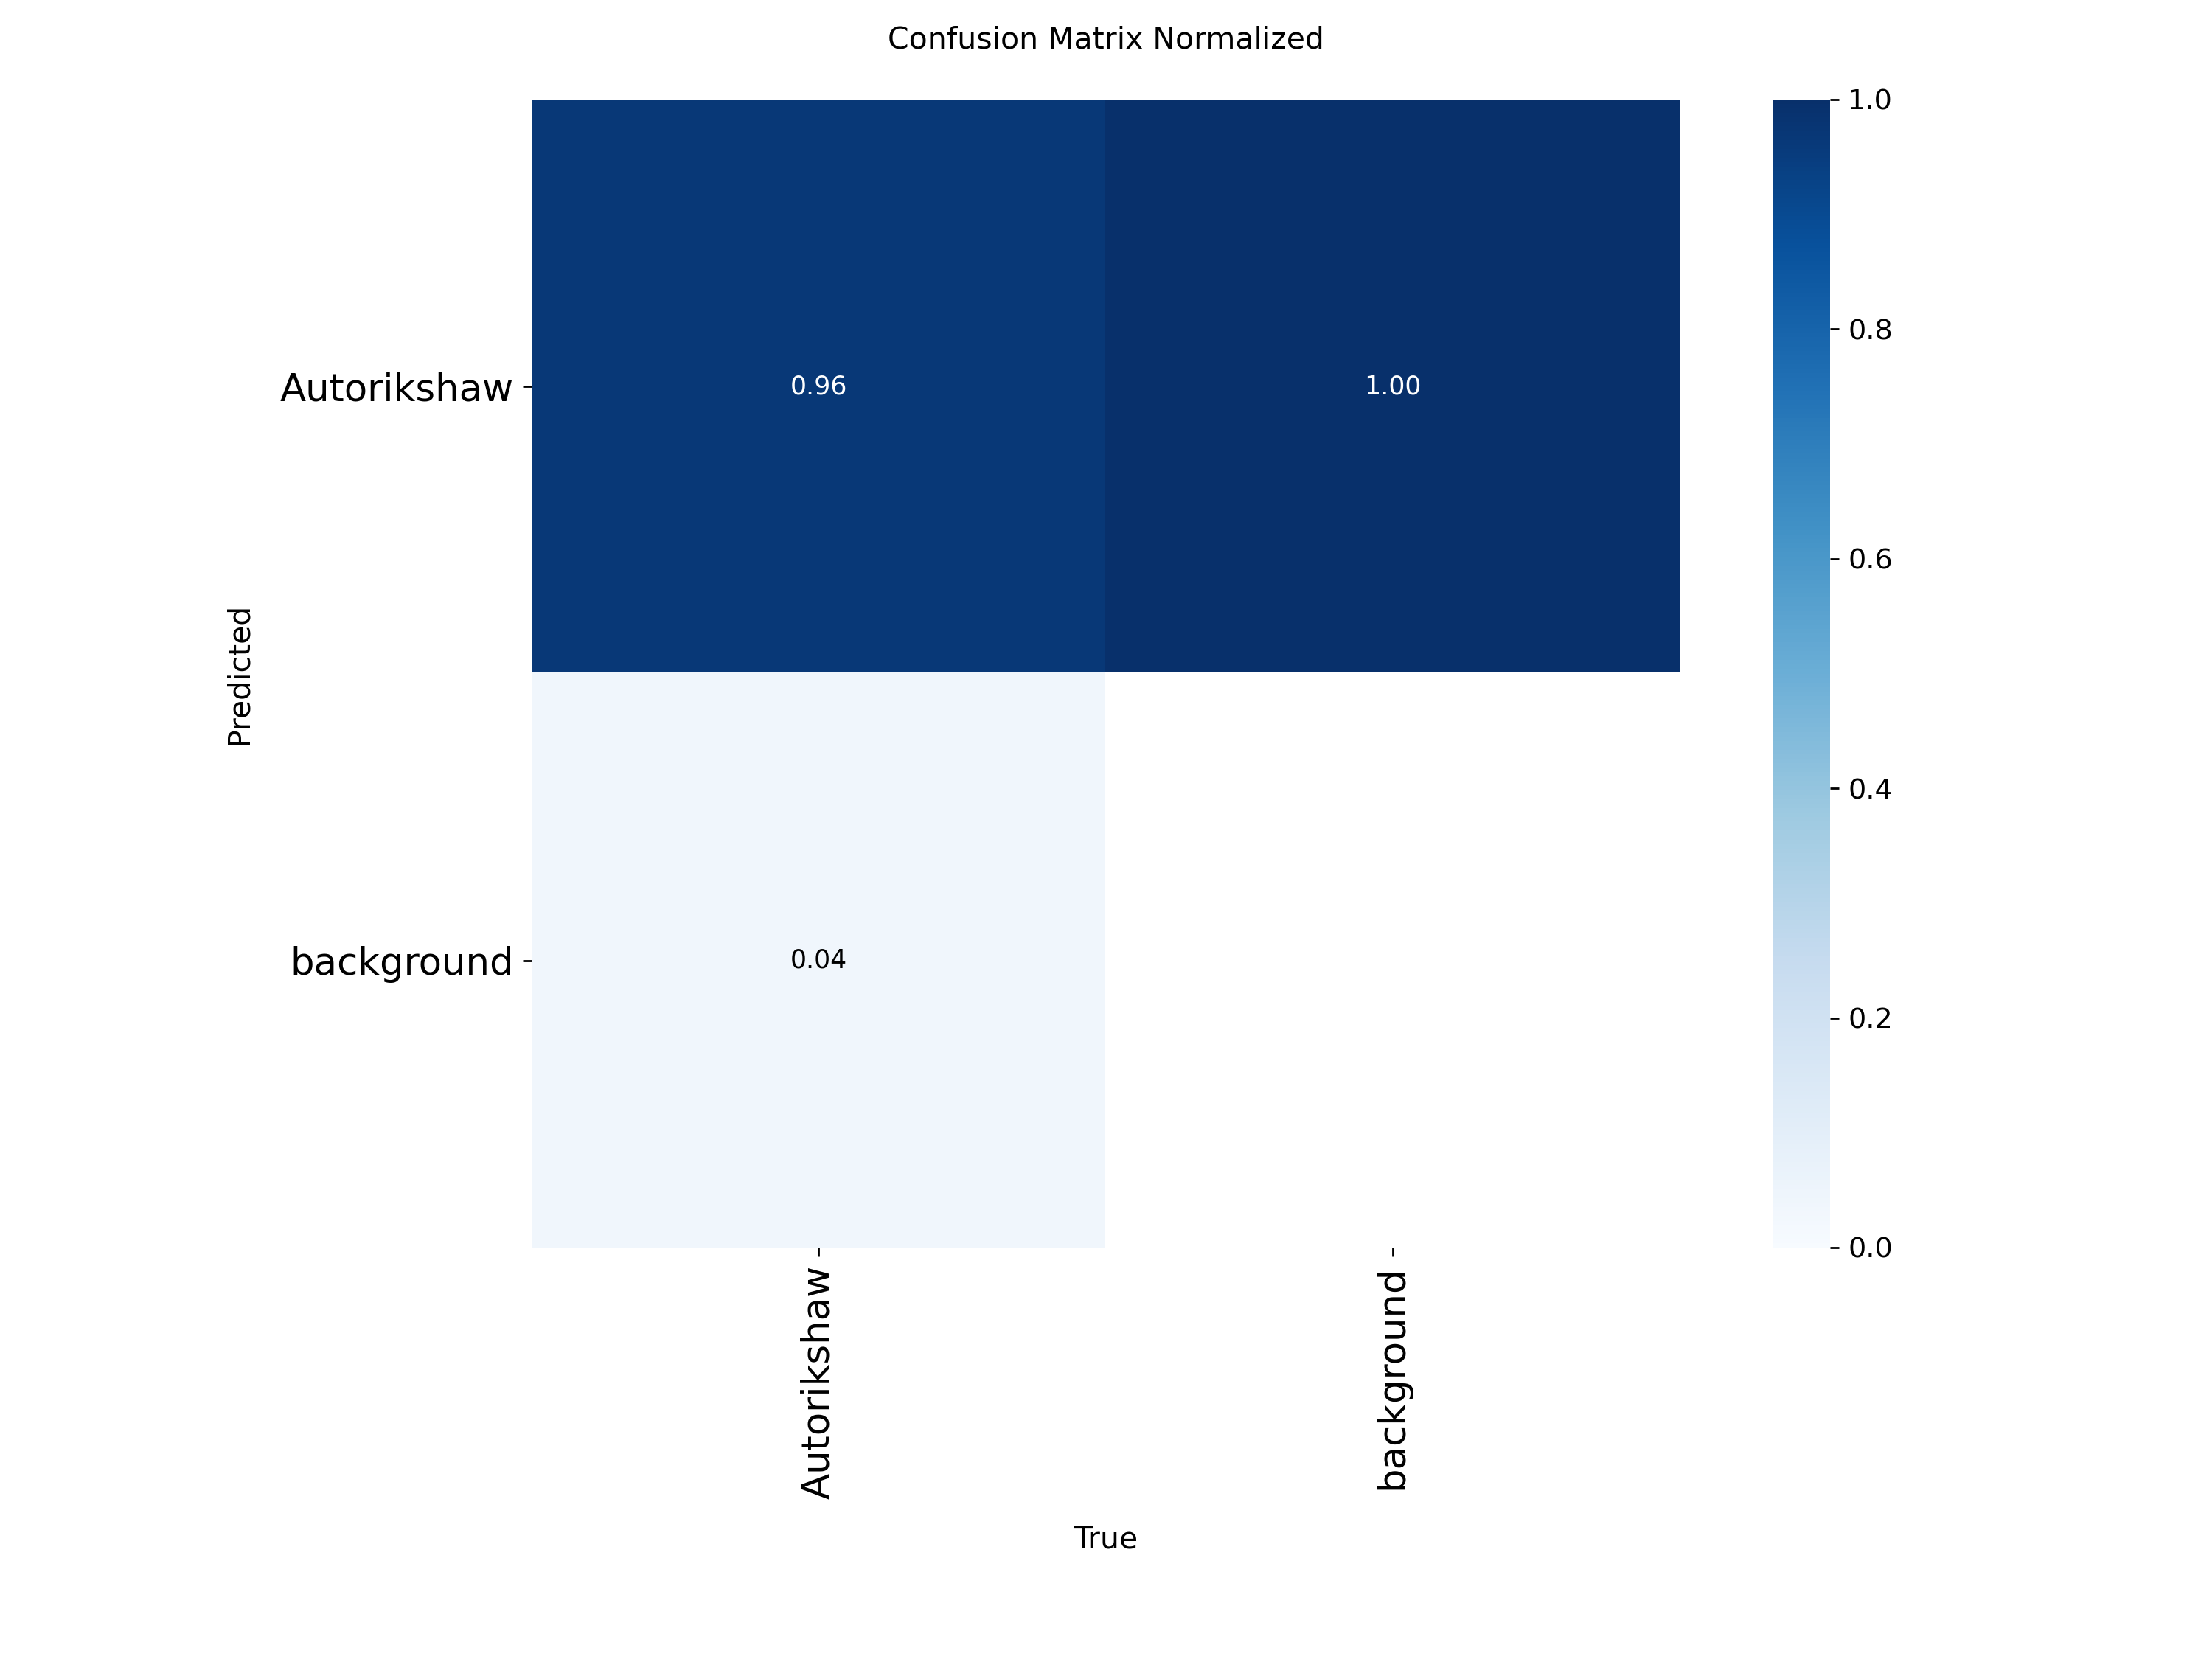

In [30]:

image_path = '/content/runs/detect/train3/confusion_matrix_normalized.png'
display(Image(filename=image_path))

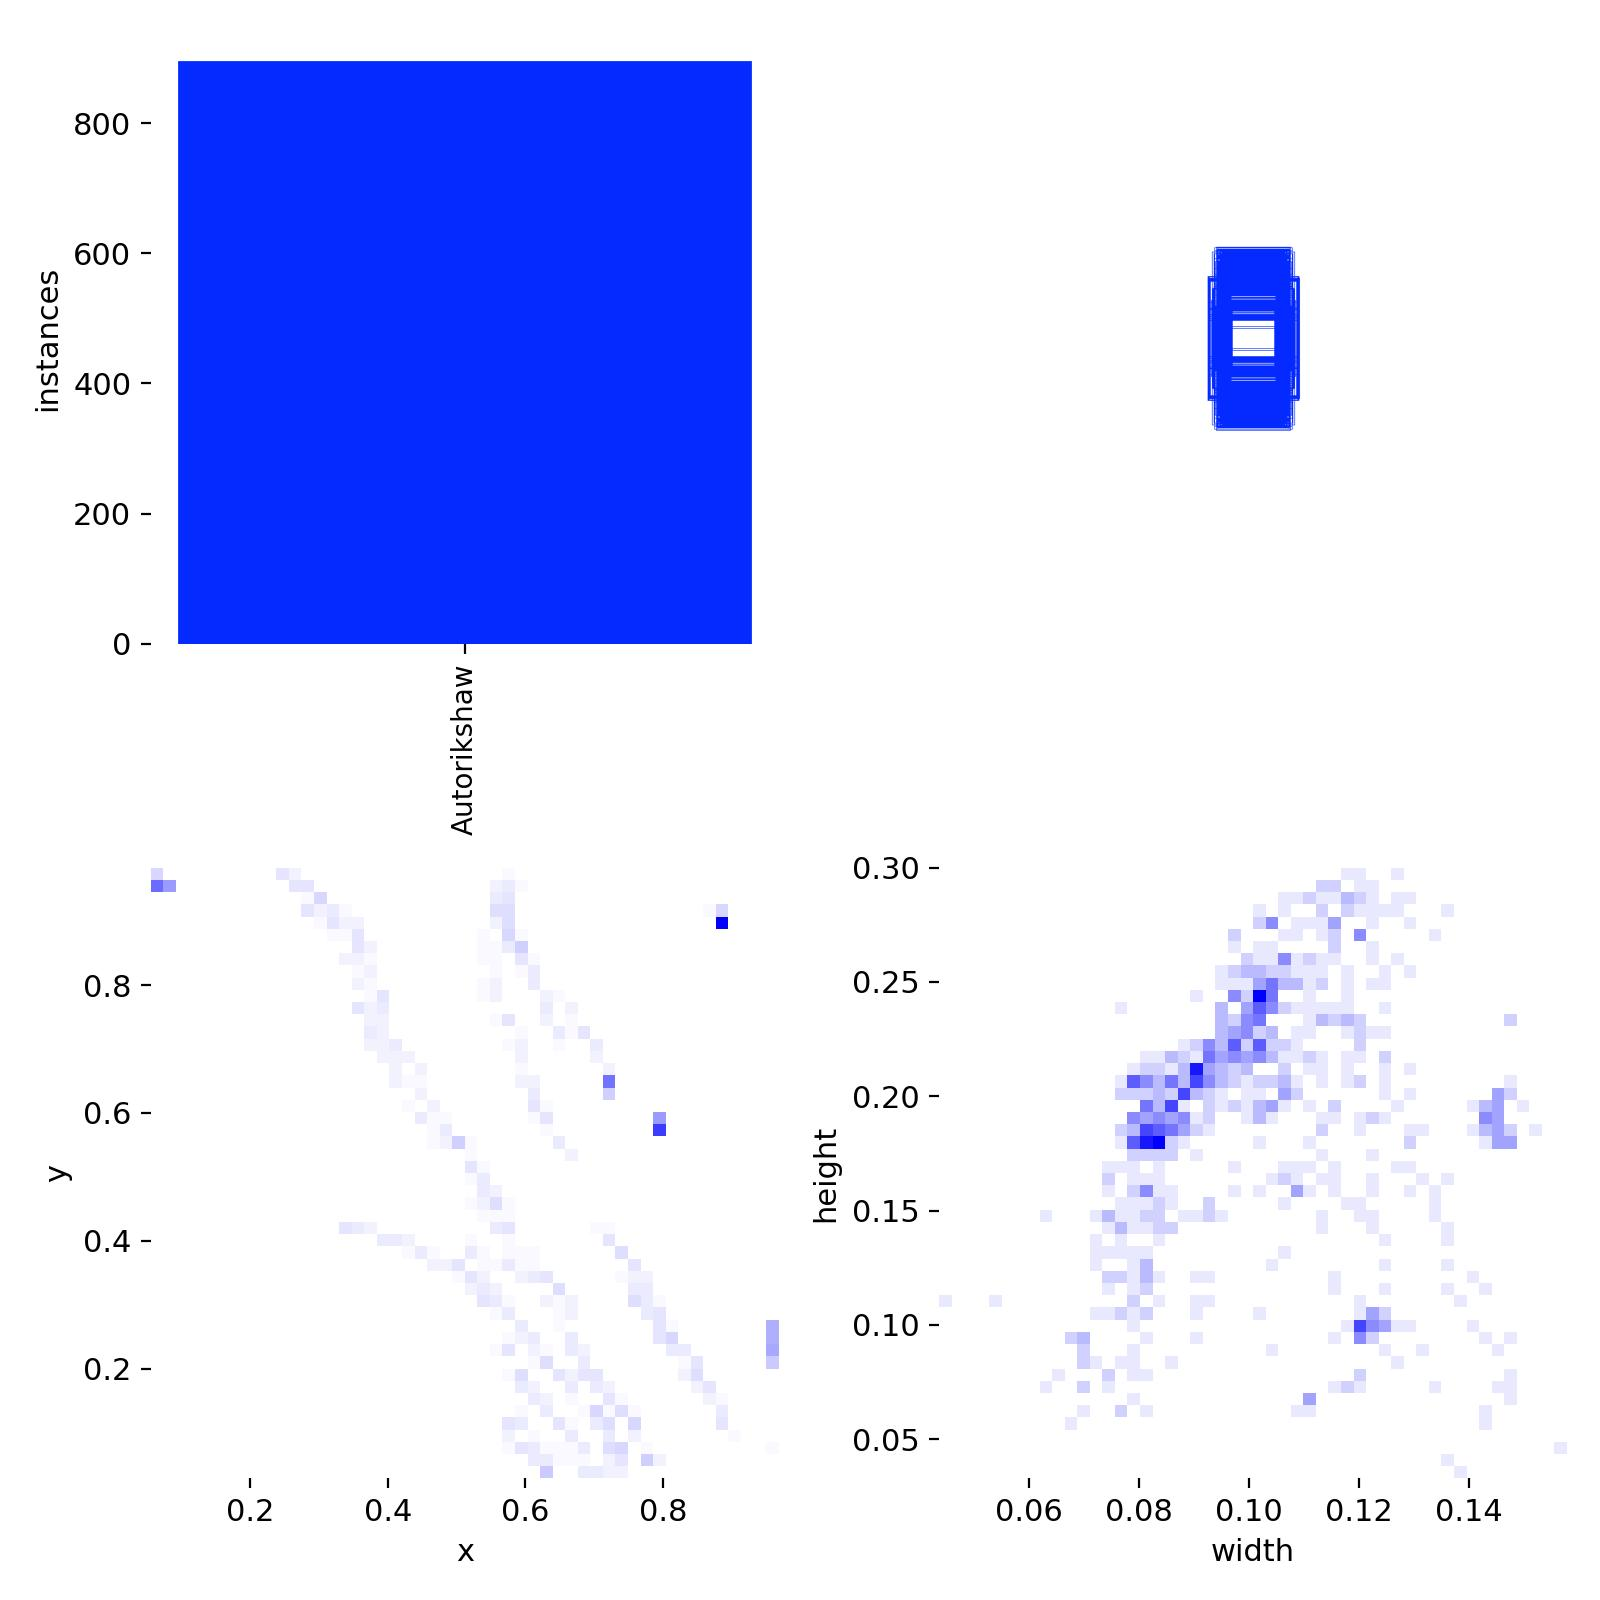

In [31]:
image_path = '/content/runs/detect/train3/labels.jpg'
display(Image(filename=image_path))

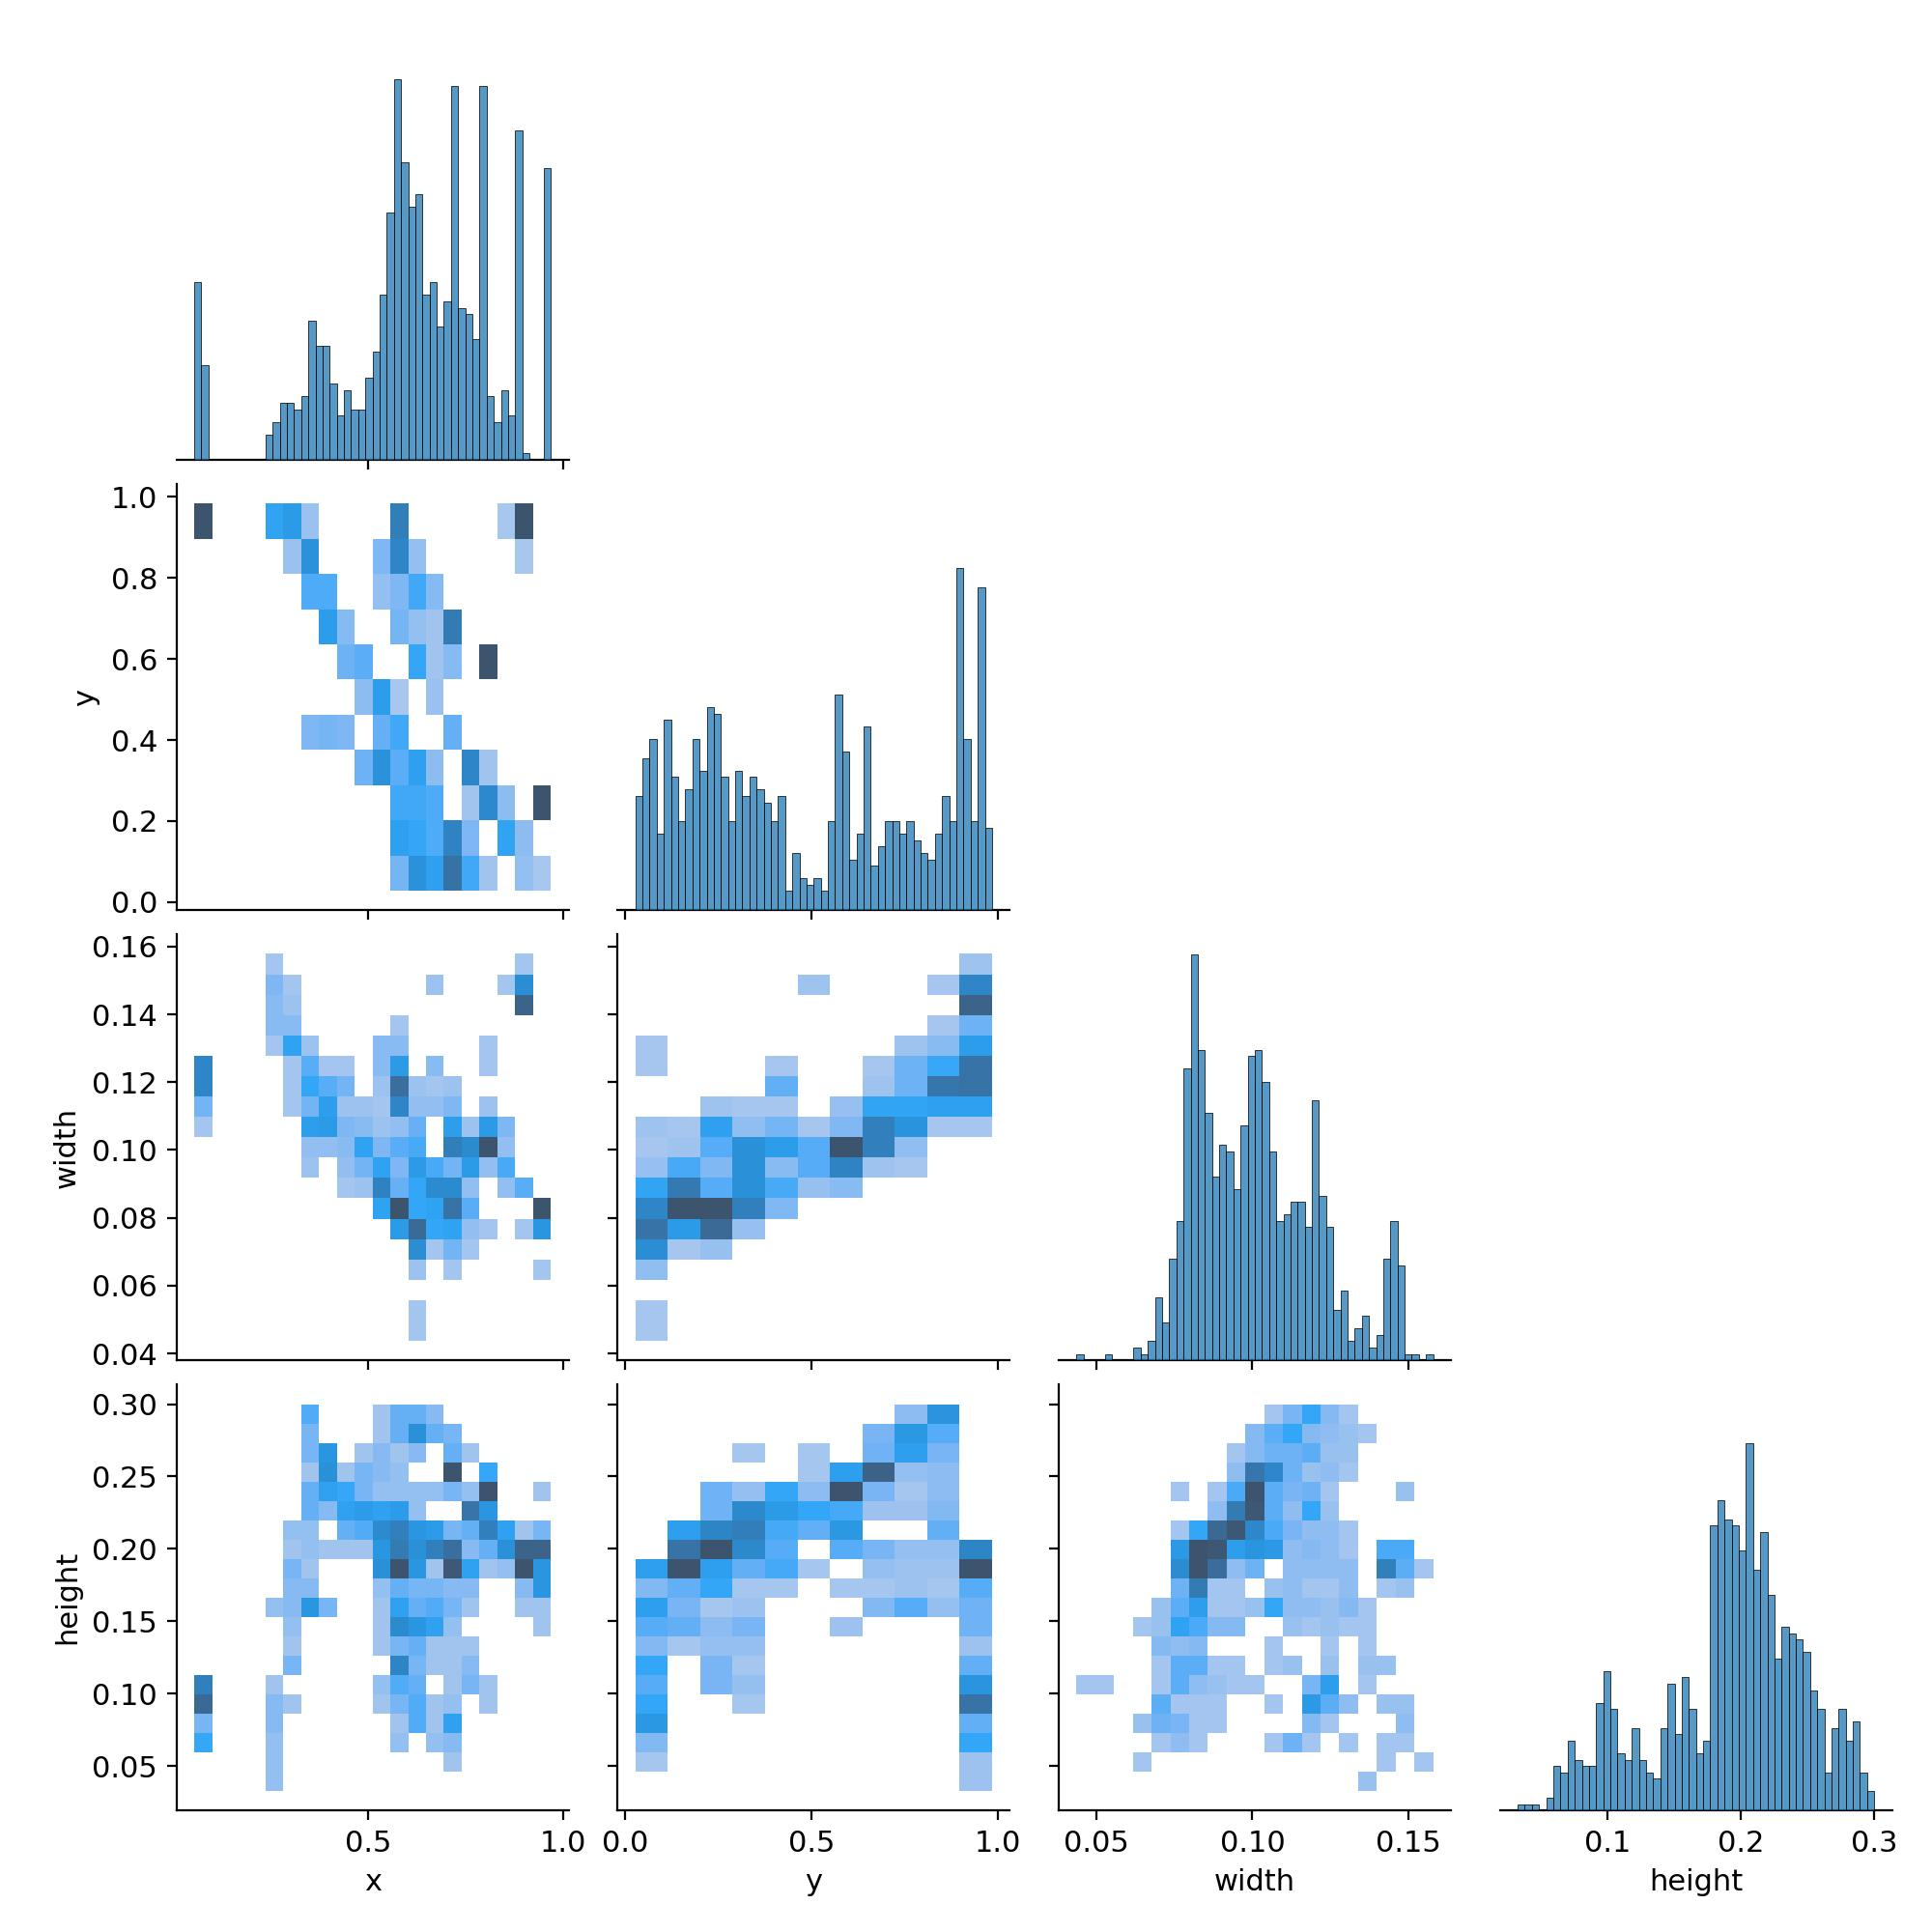

In [32]:

image_path = '/content/runs/detect/train3/labels_correlogram.jpg'
display(Image(filename=image_path))
